In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sympy import Eq, symbols, solve

In [2]:

do = pd.DataFrame({'x': [[0, 5.5, 2], [0.5, 1.5, 3]], 'y': [[0, 2.5, 2],[3,6, 4.5]]}).set_axis(['a1', 'a2'])
do = do.T
print(do)



            a1             a2
x  [0, 5.5, 2]  [0.5, 1.5, 3]
y  [0, 2.5, 2]    [3, 6, 4.5]


In [3]:
class_a1 = [(x, y) for (x, y) in [(0, 0),(5.5, 2.5), (2,2)]]

# Вихідні дані для класу a2
class_a2 = [(x, y) for (x, y) in [(0.5, 3),(1.5, 6), (3, 4.5)]]


print(f" a1: {class_a1}")
print(f" a1: {class_a2}")

 a1: [(0, 0), (5.5, 2.5), (2, 2)]
 a1: [(0.5, 3), (1.5, 6), (3, 4.5)]


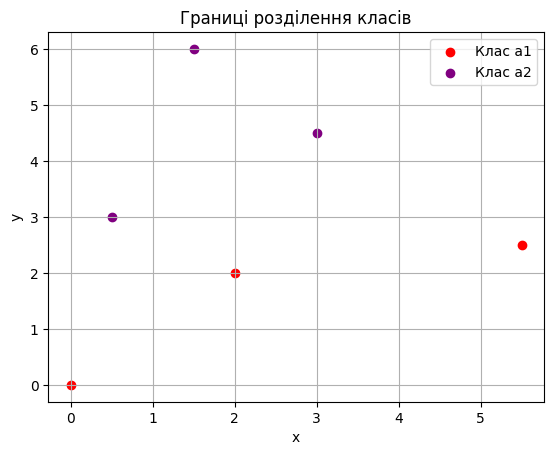

In [4]:

# Відокремлюємо координати x і y для обох класів
x_a1, y_a1 = zip(*class_a1)
x_a2, y_a2 = zip(*class_a2)

# Зобразимо точки для класу a1 зі своїми маркерами
plt.scatter(x_a1, y_a1, label='Клас a1', marker='o', color='red')

# Зобразимо точки для класу a2 зі своїми маркерами
plt.scatter(x_a2, y_a2, label='Клас a2', marker='o', color='purple')

# Додамо підписи до осей та легенду
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Границі розділення класів')
plt.show()
# Відображення графіку
plt.show()


In [5]:
# Координати точки ξ1
x1, y1 = (0,0)  # Замініть значення x1_value та y1_value на реальні координати ξ1

# Координати точки ξ4
x4, y4 = (0.5, 3)  # Замініть значення x4_value та y4_value на реальні координати ξ4

# Знаходимо координати середини відрізка [ξ1, ξ4]
M1_x = (x1 + x4) / 2
M1_y = (y1 + y4) / 2

# Виводимо координати точки M1
print(f'Координати точки M1: ({M1_x}, {M1_y})')

Координати точки M1: (0.25, 1.5)


In [6]:
# Знайдемо вектор, що вказує вздовж відрізка між точками ξ1 і ξ4. Це можна зробити, 
# віднімаючи координати ξ1 від координат ξ4:
V = (x4 - x1, y4 - y1)

# Знайдемо вектор, який перпендикулярний до вектора V
M1_x, M1_y = (0.25, 1.5)  
N = (-V[1], V[0])  # Вектор нормалі до відрізка між ξ1 і ξ4

# Рівняння нормалі
print(f'Рівняння нормалі: {N[0]}(x - {M1_x}) = {N[1]}(y - {M1_y})')

Рівняння нормалі: -3(x - 0.25) = 0.5(y - 1.5)


In [7]:
# Рівняння нормалі: -3(x - 0.25) = 0.5(y - 1.5) (g1)
print("'G1(x,y)' Pівняння описує лінію, яка розділяє точки ξ1 і ξ4 на два класи:\ny - 6(x - 0.25) - 1.5 =0")

'G1(x,y)' Pівняння описує лінію, яка розділяє точки ξ1 і ξ4 на два класи:
y - 6(x - 0.25) - 1.5 =0


In [8]:
x2=5.5
y2=2.5

# Знайдемо вектор, що вказує вздовж відрізка між точками ξ2 і ξ4. Це можна зробити, 
# віднімаючи координати ξ2 від координат ξ4:
V_2 = (x4 - x2, y4 - y2)

# Знайдемо вектор, який перпендикулярний до вектора V
M2_x, M2_y = ((x2 + x4) / 2,(y2+y4)/2)  
N_2 = (-V_2[1], V_2[0])  # Вектор нормалі до відрізка між ξ1 і ξ4

# Рівняння нормалі
print(f'Рівняння нормалі: {N_2[0]}(x - {M2_x}) = {N_2[1]}(y - {M2_y})')

Рівняння нормалі: -0.5(x - 3.0) = -5.0(y - 2.75)


In [9]:
# Рівняння нормалі: -0.5(x - 3.0) = -5.0(y - 2.75) (g2)
print("'G2(x,y)' Pівняння описує лінію, яка розділяє точки ξ2 і ξ4 на два класи:\n0.1(x-3)-y+2.75=0")

'G2(x,y)' Pівняння описує лінію, яка розділяє точки ξ2 і ξ4 на два класи:
0.1(x-3)-y+2.75=0


In [10]:
x, y = symbols('x y')


eq1 = Eq(y - 6 * (x - 0.25) - 1.5, 0)
eq2 = Eq(0.1 * (x - 3) - y + 2.75, 0)

# Розв'язання системи рівнянь
solution = solve((eq1, eq2), (x, y))
rounded_solution = {x: round(solution[x], 1), y: round(solution[y], 1)}

print("S1:")
print(rounded_solution )

S1:
{x: 0.4, y: 2.5}


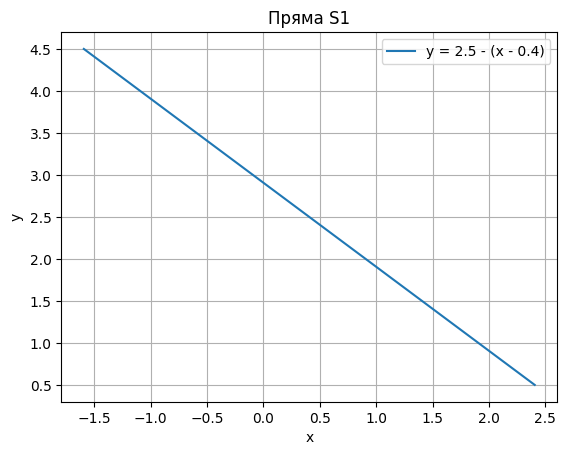

In [11]:
# Значення x та y з rounded_solution
x_value = rounded_solution[x]
y_value = rounded_solution[y]

# Діапазон значень x для графіку
x_values = [x_value - 2, x_value + 2] 

# Обчислення відповідних значень y
y_values = [y_value - (x - x_value) for x in x_values]


plt.plot(x_values, y_values, label=f'y = {y_value} - (x - {x_value})')


plt.xlabel('x')
plt.ylabel('y')
plt.title("Пряма S1")
plt.legend()
plt.grid(True)
plt.show()


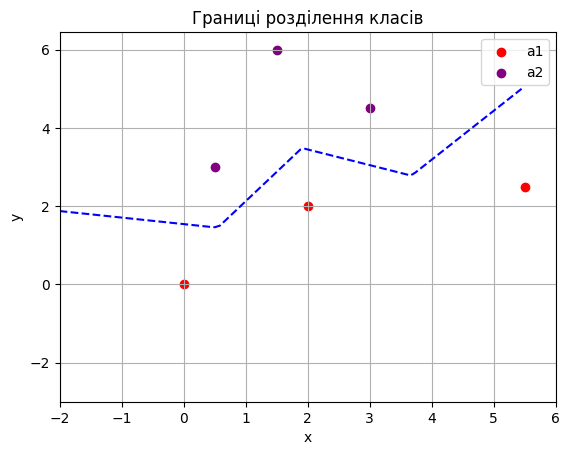

In [12]:
a1 = np.array([(0, 0),(5.5, 2.5), (2,2)])      
a2 = np.array([(0.5, 3),(1.5, 6), (3, 4.5)])

def g1(x, y):
    point = np.array([x, y])
    dis_to_a1 = np.min(np.linalg.norm(a1 - point, axis=1))
    dis_to_a2 = np.min(np.linalg.norm(a2 - point, axis=1))
    return dis_to_a1 - dis_to_a2

x = np.linspace(-2, 6, 100)
y = np.linspace(-3, 5, 100)
x, y = np.meshgrid(x, y)
z1 = np.vectorize(g1)(x, y)


plt.contour(x, y, z1, levels=[0], colors='blue', linestyles='dashed')

plt.scatter(a1[:, 0], a1[:, 1], color='r', label='a1')
plt.scatter(a2[:, 0], a2[:, 1], color='purple', label='a2')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Границі розділення класів')
plt.show()


In [13]:
def classify1(xy):
    a1_correct, a2_correct = 0, 0
    mod = len(xy) // 2  # Use integer division

    for (x, y) in xy:
        if -0.5<y<3:
            a1_correct += 1 
        else:
            a2_correct += 1

    a1_percentage = (a1_correct / mod) * 100
    a2_percentage = (a2_correct / mod) * 100

    return a1_percentage, a2_percentage

a = [(0, 0),(1.5, 6), (2,2),(0.5, 3),(5.5, 2.5), (3, 4.5)]

ad1, ad2 = classify1(a)
print(f'Percentage of a1: {ad1:.2f}%')
print(f'Percentage of a2: {ad2:.2f}%')



Percentage of a1: 100.00%
Percentage of a2: 100.00%


99.0 %
101.0 %


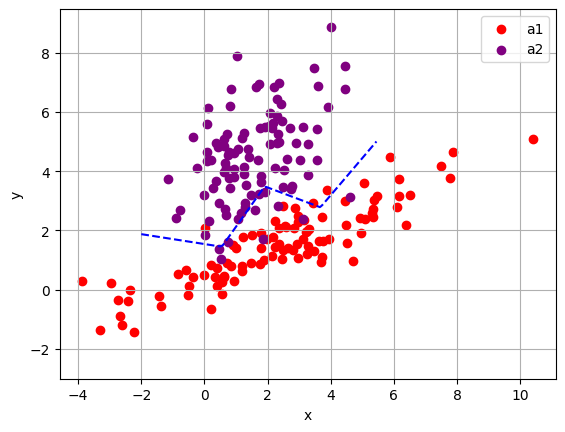

In [26]:
a1_mean=np.mean(a1,axis=0)
a2_mean=np.mean(a2,axis=0)
N=100
mu_a1,sigma_a1 =a1_mean,np.cov(a1, rowvar=False)
mu_a2,sigma_a2 =a2_mean,np.cov(a2, rowvar=False)

a1_data=np.random.multivariate_normal(mu_a1, sigma_a1,N)
a2_data=np.random.multivariate_normal(mu_a2, sigma_a2,N)

a_data=a1_data.tolist()+a2_data.tolist()
ad1, ad2 = classify1(a_data)
print (ad1 / len(a1_data) * 100, '%')
print (ad2 / len(a2_data) * 100, '%')

plt.contour(x, y, z1, levels=[0], colors='blue', linestyles='dashed')

plt.scatter(a1_data[:, 0], a1_data[:, 1], color='r', label='a1')
plt.scatter(a2_data[:, 0], a2_data[:, 1], color='purple', label='a2')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()



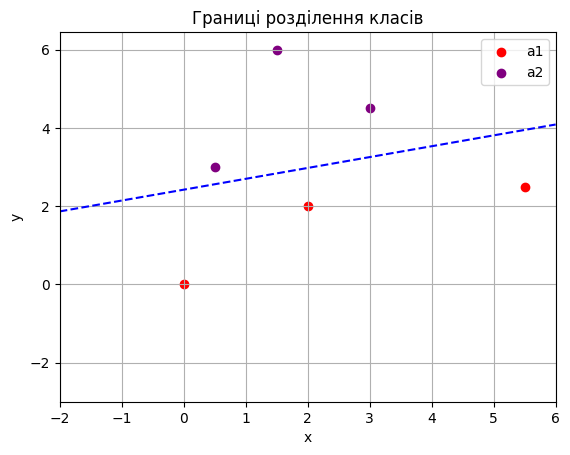

In [14]:
mean_a1=np.mean(a1,axis=0)
mean_a2=np.mean(a2,axis=0)

def g2(x, y):
    point = np.array([x, y])
    dis_to_mean_a1 = np.linalg.norm( point-mean_a1)
    dis_to_mean_a2 = np.linalg.norm( point-mean_a2)
    return dis_to_mean_a1 - dis_to_mean_a2


z2 = np.vectorize(g2)(x, y)

plt.contour(x, y, z2, levels=[0], colors='blue', linestyles='dashed')

plt.scatter(a1[:, 0], a1[:, 1], color='r', label='a1')
plt.scatter(a2[:, 0], a2[:, 1], color='purple', label='a2')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Границі розділення класів')
plt.show()

94.0 %
100.0 %


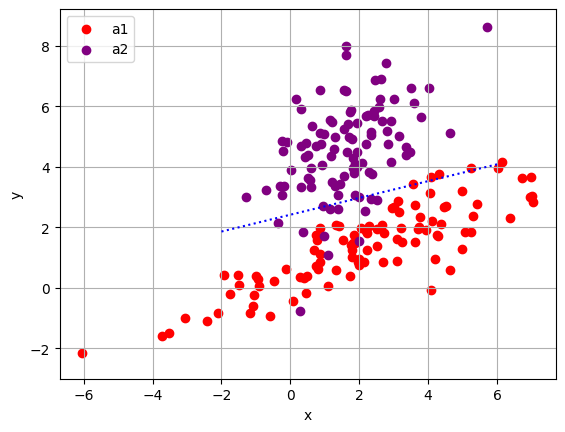

In [30]:

def classify2(xy):
    ad1, ad2,i = 0, 0, 0
    mod = len(xy) // 2  # Use integer division

    for (x, y) in xy:
        if y > round(0.26*x+2.1, 1) and i>=mod :ad1+=1
        elif i<=mod:ad2+=1
        i+=1
    return ad1,ad2    

ad1, ad2 = classify2(a_data)
print (ad1 / len(a1_data) * 100, '%')
print (ad2 / len(a2_data) * 100, '%')

plt.contour(x, y, z2, levels=[0], colors='blue', linestyles='dotted')

plt.scatter(a1_data[:, 0], a1_data[:, 1], color='r', label='a1')
plt.scatter(a2_data[:, 0], a2_data[:, 1], color='purple', label='a2')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

